<a href="https://colab.research.google.com/github/blabbree/PARE/blob/main/IMPACTLAB_UCSD_PARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Pare

%cd /content
!git clone -b dev https://github.com/camenduru/PARE
%cd /content/PARE

!source scripts/prepare_data.sh

!pip install -q git+https://github.com/mkocabas/multi-person-tracker
!pip install -q git+https://github.com/mkocabas/yolov3-pytorch
!pip install -q git+https://github.com/mattloper/chumpy
!pip install -q git+https://github.com/giacaglia/pytube
!pip install -q yacs smplx trimesh pyrender filterpy loguru flatten-dict pytorch_lightning jpeg4py

/content
Cloning into 'PARE'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 212 (delta 16), reused 8 (delta 8), pack-reused 183
Receiving objects: 100% (212/212), 20.56 MiB | 23.47 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/PARE
--2024-01-22 03:38:44--  https://www.dropbox.com/s/aeulffqzb3zmh8x/pare-github-data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aeulffqzb3zmh8x/pare-github-data.zip [following]
--2024-01-22 03:38:44--  https://www.dropbox.com/s/raw/aeulffqzb3zmh8x/pare-github-data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f188d6af909472038b16a71f0.dl.dropboxusercontent.com/cd/0/inlin

# **Annotating Images:**

In [ ]:
# Here is an example image that you can download to test on
# https://drive.google.com/file/d/1WjHl7QravHqdciA3VugcQoWFFPPgqAV9/view?usp=sharing

In [ ]:
# Annotate an image
# First upload the example image to google colab on the left-hand side folder tab

%cd /content/PARE

!python scripts/demo.py --vid_file /content/COCO_train2014_000000401400.jpg --output_folder /content/PARE/logs/demo


/content/PARE
/usr/local/lib/python3.10/dist-packages/multi_person_tracker/sort.py:27: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iou(bb_test, bb_gt):
/content/PARE/./pare/models/backbone/hrnet.py:554: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or self.pretrained_layers[0] is '*':
Running "ffmpeg -i /content/COCO_train2014_000000401400.jpg -f image2 -v error /content/PARE/logs/demo/COCO_train2014_000000401400.jpg/tmp_images/%06d.png"
Images saved to "/content/PARE/logs/demo/COCO_train2014_000000401400.jpg/tmp_images"
2024-01-22 03:49:13.593 | INFO     | __main__:main:97 - Demo options: 
 Namespace(cfg='data/pare/checkpoints/pare_w_3dpw_config.yaml', ckp

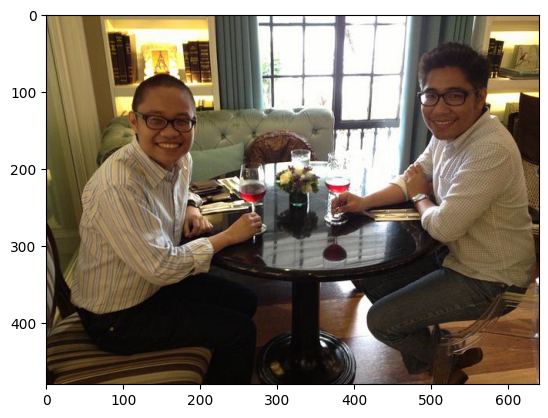

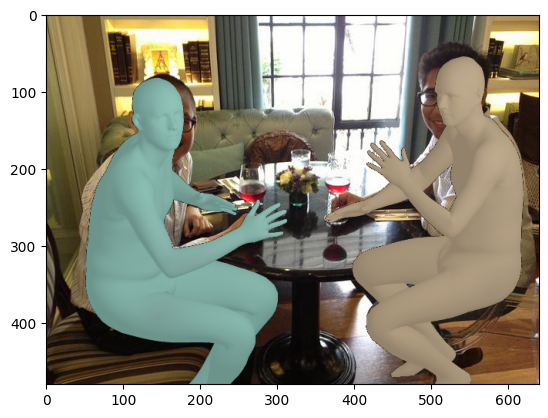

In [ ]:
# Visualize annotation results

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_original = mpimg.imread('/content/PARE/logs/demo/COCO_train2014_000000401400.jpg/tmp_images/000001.png')
implot = plt.imshow(img_original)
plt.show()
img = mpimg.imread('/content/PARE/logs/demo/COCO_train2014_000000401400.jpg/tmp_images_output/000000.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Understand the output file: pare_output.pkl within the logs/demo/your_test_image_name/pare_output.pkl
import joblib

# your own test video
output = joblib.load('/content/PARE/logs/demo/COCO_train2014_000000401400.jpg/pare_output.pkl')

# first check how many tracks there are, as you can see in the image there are two people
# so you should see 2 tracks
print('Track ids:', output.keys(), end='\n\n')

# second, check how many frames were annotated
# since you are annotating images, there should be only one frame,
# this is the dimension parameter at the begining of each output, e.g., joints3d (1, 49, 3), the "1" indicates 1 frame
print('VIBE output file content:', end='\n\n')
for k,v in output[1].items():
  if k != 'joints2d':
    print(k, v.shape)


Track ids: dict_keys([2, 1])

VIBE output file content:

pred_cam (1, 3)
orig_cam (1, 4)
verts (1, 6890, 3)
pose (1, 24, 3, 3)
betas (1, 10)
joints3d (1, 49, 3)
smpl_joints2d (1, 49, 2)
bboxes (1, 4)
frame_ids (1,)


In [ ]:
# Understand each of the output above in more detail

# you can first get the track of one of the people,
# this will return a dictionary
track1 = output[1]
track2 = output[2]

# look at the keys for the dictionary
# these are the annotations pare provides
# the keys for all people (i.e., tracks) should be the same
print('PARE Annotations for Person 1:', track1.keys(), end='\n\n')
print('PARE Annotations for Person 2:', track2.keys(), end='\n\n')

# you can examine some of these keys
# joints3d information can be found here: https://github.com/mkocabas/PARE/blob/master/pare/utils/kp_utils.py#L342
# joints3d output 49 joints, but as you can see in the document above, the last 24 joints are redundant
# so normally we just take the first 25 annotations from open pose, i.e., those starts with "OP"
# remember that you will need to point to the first frame by using the [0] at the end
print('PARE 3D Joint Annotations for Person 1:',track1['joints3d'][0], end='\n\n')
print('PARE 3D Joint Annotations shape for Person 1:',track1['joints3d'][0].shape, end='\n\n')
print('PARE 3D Joint Annotations for Person 2:',track2['joints3d'][0], end='\n\n')
print('PARE 3D Joint Annotations shape for Person 2:',track2['joints3d'][0].shape, end='\n\n')

# you can also check out the body shape parameters
print('PARE Body Shape Annotations for Person 1:',track1['betas'][0], end='\n\n')
print('PARE Body Shape Annotations shape for Person 1:',track1['betas'][0].shape, end='\n\n')
print('PARE Body Shape Annotations for Person 2:',track2['betas'][0], end='\n\n')
print('PARE Body Shape Annotations shape for Person 2:',track2['betas'][0].shape, end='\n\n')

PARE Annotations for Person 1: dict_keys(['pred_cam', 'orig_cam', 'verts', 'pose', 'betas', 'joints3d', 'joints2d', 'smpl_joints2d', 'bboxes', 'frame_ids'])

PARE Annotations for Person 2: dict_keys(['pred_cam', 'orig_cam', 'verts', 'pose', 'betas', 'joints3d', 'joints2d', 'smpl_joints2d', 'bboxes', 'frame_ids'])

PARE 3D Joint Annotations for Person 1: [[-0.14705831 -0.74759793 -0.3070802 ]
 [-0.01370885 -0.68295205 -0.17136751]
 [-0.07521047 -0.6706276   0.00967112]
 [-0.217472   -0.488954    0.13491873]
 [-0.40979606 -0.3935562  -0.02068713]
 [ 0.01870408 -0.5519328  -0.30670592]
 [-0.09739735 -0.3074457  -0.30864787]
 [-0.27356845 -0.4753722  -0.21772599]
 [-0.00296838 -0.2290162   0.02447773]
 [-0.04689106 -0.17651187  0.11025654]
 [-0.41361555 -0.16388245  0.26377904]
 [-0.15961121  0.13022225  0.41074878]
 [-0.02500523 -0.12302194 -0.00268341]
 [-0.36177886  0.04687917 -0.10020384]
 [-0.10419349  0.22145659  0.17480992]
 [-0.1506707  -0.7985859  -0.26988602]
 [-0.10195859 -0.791

In [ ]:
# comparison between the two people

# how similar are their body shape? looks pretty similar in the image
import numpy as np
pearson_corr = np.corrcoef(track1['betas'][0], track2['betas'][0])[0,1]
print("Body Shape Similarity Measured in Pearson Correlation: ",pearson_corr, end="\n\n")


# how similar are their poses? looks pretty different in the image
# first compute the pairwise distance between all the first 25 joints for each person
from scipy.spatial.distance import pdist, squareform
# compute the euclidean distances between each pair of joints in the 3d space for each person
distances1 = pdist(track1['joints3d'][0][0:25], metric='euclidean')
distances2 = pdist(track2['joints3d'][0][0:25], metric='euclidean')
# the above returns only a "flat" array that consists only of the upper triangle of the distance matrix
# the line below convert this "flat" array back into a distance matrix
dist_matrix1 = squareform(distances1)
dist_matrix2 = squareform(distances2)
print("Check the shape of the distance matrix between all the 25 joints: ", dist_matrix1.shape, end="\n\n")

# then compare how similar the two distance matrices of the two people are
# for instance, you could just compute the Pearson correlation between the two "flat" arrays with distances between all joints
pearson_corr_pose = np.corrcoef(distances1, distances2)[0,1]
print("You see that the similarity between the pairwise-distance of joints between the two people are high: ", pearson_corr_pose, end="\n\n")

# You can also just select subsets of the joints to compare body pose:
# look at the joint ID here https://github.com/mkocabas/PARE/blob/master/pare/utils/kp_utils.py#L342
# e.g., you may find the first joint 0 to join 14 that really matter to pose
distances1_sub = pdist(track1['joints3d'][0][0:15], metric='euclidean')
distances2_sub = pdist(track2['joints3d'][0][0:15], metric='euclidean')
pearson_corr_pose_sub = np.corrcoef(distances1_sub, distances2_sub)[0,1]
print("This distance based on the subset of joints is a bit lower, but still high: ", pearson_corr_pose_sub, end="\n\n")


Body Shape Similarity Measured in Pearson Correlation:  0.9996624825147008

Check the shape of the distance matrix between all the 25 joints:  (25, 25)

You see that the similarity between the pairwise-distance of joints between the two people are high:  0.9777166836158088

This distance based on the subset of joints is a bit lower, but still high:  0.9469454169462752



# **Annotating videos:**

In [ ]:
# Here is an example video that you can download to test on
# https://drive.google.com/file/d/16EEjQY0cn-BetY6Xgu7wbzVCDQ1ZtfeY/view?usp=sharing

In [ ]:
# Annotate a video

%cd /content/PARE

# Upload your own video into the pare test folder
# The original file name, for instance _mtiuHyOFXg.003.mp4 is problematic for colab because the first .003 looks like the extension
# Change name with "." to "_" so that it is not confused with .mp4
!python scripts/demo.py --vid_file /content/1uC-2TZqplE.003.mp4 --output_folder /content/PARE/logs/demo

/content/PARE
/usr/local/lib/python3.10/dist-packages/multi_person_tracker/sort.py:27: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iou(bb_test, bb_gt):
Running "ffmpeg -i /content/1uC-2TZqplE.003.mp4 -f image2 -v error /content/PARE/logs/demo/1uC-2TZqplE.003_/tmp_images/%06d.png"
Images saved to "/content/PARE/logs/demo/1uC-2TZqplE.003_/tmp_images"
2024-01-22 04:03:24.124 | INFO     | __main__:main:97 - Demo options: 
 Namespace(cfg='data/pare/checkpoints/pare_w_3dpw_config.yaml', ckpt='data/pare/checkpoints/pare_w_3dpw_checkpoint.ckpt', exp='', mode='video', vid_file='/content/1uC-2TZqplE.003.mp4', image_folder=None, output_folder='/content/PARE/logs/demo', tracking_

In [ ]:
# Visualize annotation results

from IPython.display import HTML
from base64 import b64encode

def video(path):
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML('<video height=400 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

# your own video
#video('/content/1uC-2TZqplE.003.mp4')
video('/content/PARE/logs/demo/1uC-2TZqplE.003_/1uC-2TZqplE.003__result.mp4')

In [ ]:
# Understand the output file: pare_output.pkl within your video name folder
import joblib

# your own test video
output = joblib.load('/content/PARE/logs/demo/1uC-2TZqplE.003_/pare_output.pkl')

# first check how many tracks there are, since your test video has only one person, who stays on the screen the whole time,
# there should only be one track in the pare output
print('Track ids:', output.keys(), end='\n\n')

# second, check how many frames were annotated, the number of frames = video length * frame rate
# this test video is 15.32s long --> to check the exact length of the video, you can open the video using Quicktime Player, click "Edit" --> "Trim",
# this will show the frames at the bottom of the video, you can drag the timeline across the frames to the end to see the exact length of your video;
# windows may have other video viewer that works differently
# this test video has a frame rate of 23.98 --> to check the frame rate, you can open the video using Quicktime Player, use shortcut command+i on your keyboard
# the FPS parameter indicates the frame rate of the video, windows may have other video viewer that works differently
# therefore the number of frames = 15.32 * 23.98 = 367.37, as you see below, the number of frames is exactly 367
print('VIBE output file content:', end='\n\n')
for k,v in output[1].items():
  if k != 'joints2d':
    print(k, v.shape)


Track ids: dict_keys([1])

VIBE output file content:

pred_cam (459, 3)
orig_cam (459, 4)
verts (459, 6890, 3)
pose (459, 24, 3, 3)
betas (459, 10)
joints3d (459, 49, 3)
smpl_joints2d (459, 49, 2)
bboxes (459, 4)
frame_ids (459,)
